<a href="https://colab.research.google.com/github/adiyaksap/Data_Project/blob/main/GoodReads_Science_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#insert data and import library module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
from pandas_datareader.data import DataReader

df = pd.read_csv('/content/drive/MyDrive/Nyoba_Data/goodreads_data_science_books.csv')
display(df)

,authorName,bookFormat,bookId,description,numberOfPages,numberOfRatings,numberOfReviews,publishedBy,publishedDate,rating,title
0,Roger D. Peng,ebook,26299386,"This book describes, simply and in general ter...",154.0,274,39,Leanpub,"September 5, 2015",3.74,The Art of Data Science: A Guide for Anyone Wh...
1,Lillian Pierson,Paperback,56751800,Monetize your company’s data and data science ...,432.0,231,25,For Dummies,"September 15, 2021",3.45,Data Science For Dummies (For Dummies
2,John D. Kelleher,Paperback,36722689,<b>A concise introduction to the emerging fiel...,280.0,752,89,The MIT Press,"April 13, 2018",3.91,Data Science
3,Jake Vanderplas,Paperback,26457146,"For many researchers, Python is a first-class ...",546.0,593,56,O'Reilly Media,"January 3, 2017",4.31,Python Data Science Handbook: Essential Tools ...
4,Oliver Theobald,Kindle Edition,35518108,<b> To buy the newest edition of this book (20...,168.0,394,18,Scatterplot Press,"June 21, 2017",4.13,Machine Learning For Absolute Beginners: A Pla...
...,...,...,...,...,...,...,...,...,...,...,...
387,Quick Start Guides,Kindle Edition,26162071,\n <b>Please Note: You Don't Need a Kindle D...,147.0,10,0,Ruby Quick Start Guide ~ Read FREE with KU Sub...,"August 23, 2015",3.70,RUBY: 2nd Edition! Beginner's Crash Course - R...
388,V.K. Jain,Paperback,50209008,<b>About Author</b><p>Dr. V.K. Jain is a well ...,275.0,1,0,Khanna Publishing,"January 1, 2018",5.00,Data Science and Analytics
389,nitin,Kindle Edition,31286376,100 Questions To Crack Business Interview cont...,34.0,11,0,NaN,"July 20, 2016",4.09,100 Questions To Crack Business Analyst Interv...
390,Ashutosh R. Nandeshwar,Kindle Edition,39097317,There's a reason why data scientists are in a ...,618.0,10,0,Data Insight Partners LLC,"March 3, 2018",4.10,Data Science for Fundraising: Build Data-Drive...


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   authorName       392 non-null    object        
 1   bookFormat       386 non-null    object        
 2   bookId           392 non-null    int64         
 3   description      379 non-null    object        
 4   numberOfPages    392 non-null    float64       
 5   numberOfRatings  392 non-null    int64         
 6   numberOfReviews  392 non-null    int64         
 7   publishedBy      271 non-null    object        
 8   publishedDate    392 non-null    datetime64[ns]
 9   rating           392 non-null    float64       
 10  title            392 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 33.8+ KB


In [152]:
df.isna().sum()

authorName           0
bookFormat           6
bookId               0
description         13
numberOfPages        0
numberOfRatings      0
numberOfReviews      0
publishedBy        121
publishedDate        0
rating               0
title                0
dtype: int64

In [151]:
#Data Cleansing 1: Convert to Date
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

#Data Cleansing 2: Taking unused columns description and publishedBy
df_new = df.drop(['description','publishedBy'], axis = 1)

#Data Cleansing 3: Fill NaN
df['numberOfPages'].fillna(250,inplace = True)
df['rating'].fillna(4.50,inplace = True)

display(df_new)




,authorName,bookFormat,bookId,numberOfPages,numberOfRatings,numberOfReviews,publishedDate,rating,title
0,Roger D. Peng,ebook,26299386,154.0,274,39,2015-09-05,3.74,The Art of Data Science: A Guide for Anyone Wh...
1,Lillian Pierson,Paperback,56751800,432.0,231,25,2021-09-15,3.45,Data Science For Dummies (For Dummies
2,John D. Kelleher,Paperback,36722689,280.0,752,89,2018-04-13,3.91,Data Science
3,Jake Vanderplas,Paperback,26457146,546.0,593,56,2017-01-03,4.31,Python Data Science Handbook: Essential Tools ...
4,Oliver Theobald,Kindle Edition,35518108,168.0,394,18,2017-06-21,4.13,Machine Learning For Absolute Beginners: A Pla...
...,...,...,...,...,...,...,...,...,...
387,Quick Start Guides,Kindle Edition,26162071,147.0,10,0,2015-08-23,3.70,RUBY: 2nd Edition! Beginner's Crash Course - R...
388,V.K. Jain,Paperback,50209008,275.0,1,0,2018-01-01,5.00,Data Science and Analytics
389,nitin,Kindle Edition,31286376,34.0,11,0,2016-07-20,4.09,100 Questions To Crack Business Analyst Interv...
390,Ashutosh R. Nandeshwar,Kindle Edition,39097317,618.0,10,0,2018-03-03,4.10,Data Science for Fundraising: Build Data-Drive...


##**Book Format Categorized**

In this data, there are three kind of book format:


*   eBook
*   Paperback
*   Kindle Edition





In [163]:
df_categorized = pd.pivot_table(
    data=df_new,
    index='bookFormat',
    aggfunc='count'
)

display(df_categorized)

,authorName,bookId,numberOfPages,numberOfRatings,numberOfReviews,publishedDate,rating,title
bookFormat,,,,,,,,
Hardcover,34,34,34,34,34,34,34,34
Kindle Edition,208,208,208,208,208,208,208,208
Paperback,117,117,117,117,117,117,117,117
ebook,27,27,27,27,27,27,27,27


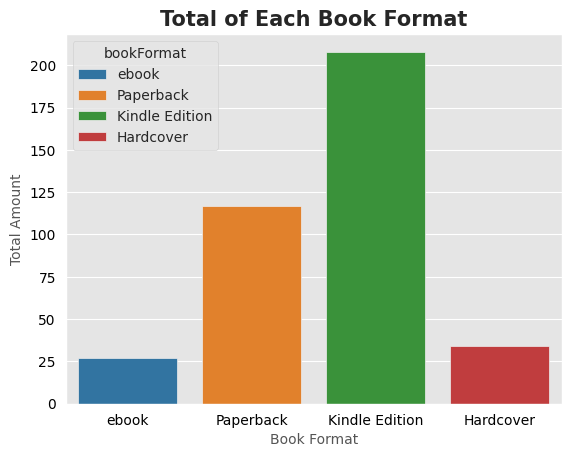

In [155]:
#making countplot
sn.countplot(data=df_new,x='bookFormat',hue = 'bookFormat',palette='tab10')
plt.title('Total of Each Book Format',size = 15, weight = 'bold')
plt.xlabel('Book Format', size = 10)
plt.ylabel('Total Amount', size = 10)
plt.xticks(color='black')
plt.yticks(color='black')
plt.style.use('ggplot')


plt.show()

##**Correlation Between Variables**

In [161]:
corr = df.corr(method = 'pearson')
corr

<ipython-input-161-cbb2787d0da5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


,bookId,numberOfPages,numberOfRatings,numberOfReviews,rating
bookId,1.000000,0.128010,-0.198678,-0.177741,0.193250
numberOfPages,0.128010,1.000000,0.072976,0.063430,0.278704
numberOfRatings,-0.198678,0.072976,1.000000,0.950723,0.097958
numberOfReviews,-0.177741,0.063430,0.950723,1.000000,0.111868
rating,0.193250,0.278704,0.097958,0.111868,1.000000


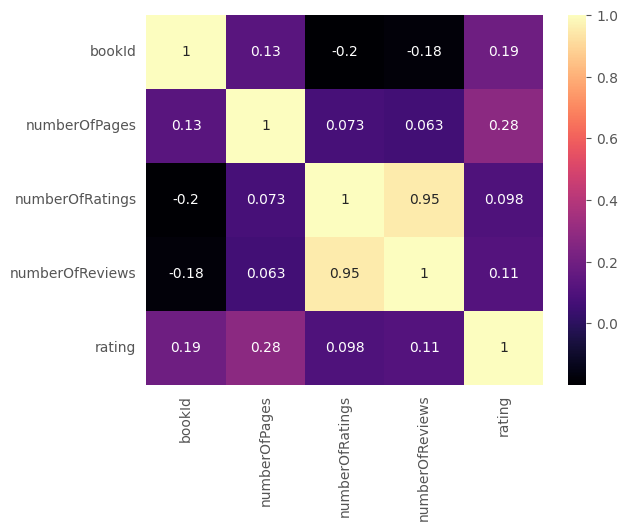

In [160]:
#Heat Map Correlation
sn.heatmap(corr,annot = True, cmap='magma')
plt.show()

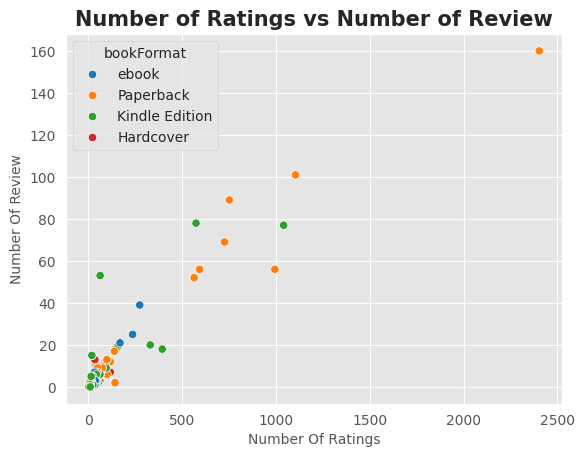

In [159]:
#Scatter Plot on Number of Ratings vs Number Of Review
sn.scatterplot(data=df_new,x='numberOfRatings', y='numberOfReviews',hue ='bookFormat',palette='tab10')
plt.title('Number of Ratings vs Number of Review',size = 15, weight = 'bold')
plt.xlabel('Number Of Ratings',size = 10)
plt.ylabel('Number Of Review',size = 10)
sn.set_style('whitegrid')
plt.style.use('ggplot')
plt.show()

##**Trend Analysis Based on Published Date**

###*Trend Analysis Published Date on Total Book Count*

In [157]:
#pivot table
df_trend = pd.pivot_table(
    data = df_new,
    index = 'publishedDate',
    values ='bookFormat',
    aggfunc = 'count')

display(df_trend)

,bookFormat
publishedDate,
1970-01-01,7
1997-12-04,2
2012-11-02,2
2013-01-01,0
2013-09-17,2
...,...
2022-09-21,1
2022-11-09,2
2023-07-04,2


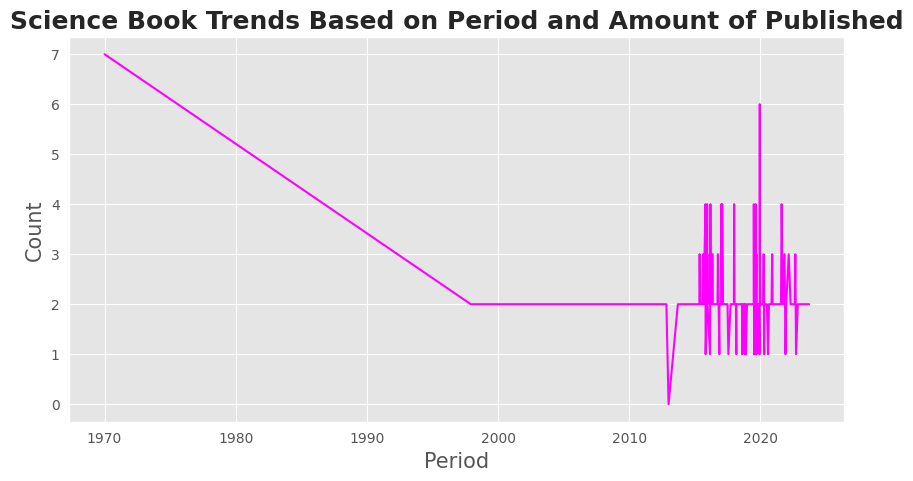

In [158]:
#Lineplot
plt.figure(figsize = (10,5))
sn.lineplot(data=df_trend,x='publishedDate',y='bookFormat',color='magenta')
plt.title('Science Book Trends Based on Period and Amount of Published',size = 18, weight = 'bold')
plt.xlabel('Period',size = 15)
plt.ylabel('Count', size = 15)

plt.show()

